# Recurrent Neural Networks

calcular o preço das ações do google

In [33]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Importing the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [35]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [36]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [37]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GRU

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(
    GRU(
        units=50,
        activation="tanh",
        recurrent_activation="sigmoid",
        use_bias=True,
        return_sequences=True,
        input_shape=(x_train.shape[1], 1),
    )
)
regressor.add(Dropout(0.2))

# Adding the second GRU layer and some Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third GRU layer and some Dropout regularisation
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units=50,))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(
    optimizer="nadam",
    loss="mean_squared_error",
    metrics=["accuracy", "mse"],
)

In [38]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0138 - accuracy: 0.0017 - mse: 0.0138
Epoch 2/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0058 - accuracy: 0.0017 - mse: 0.0058
Epoch 3/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046 - accuracy: 0.0017 - mse: 0.0046
Epoch 4/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0039 - accuracy: 0.0017 - mse: 0.0039
Epoch 5/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0036 - accuracy: 0.0017 - mse: 0.0036
Epoch 6/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0032 - accuracy: 0.0017 - mse: 0.0032
Epoch 7/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0029 - accuracy: 0.0017 - mse: 0.0029
Epoch 8/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0032 - accuracy: 0.0017 - mse: 0.0032
Epoch 9/50
1198/1198 [==============================] - 8s 6ms/step - lo

In [41]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i - 60 : i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

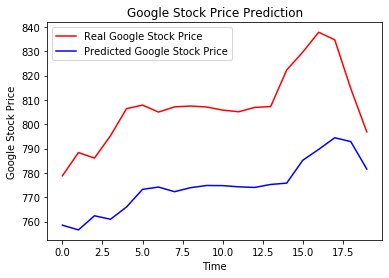

In [42]:
# Visualising the results
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

## FIM